In [1]:
VARAD PARCHURE

import numpy as np
import pandas as pd

In [4]:
rating=pd.read_csv("C:/Users/ROG/Desktop/ml-latest-small/ratings.csv")

In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movie= pd.read_csv("C:/Users/ROG/Desktop/ml-latest-small/movies.csv")
movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
#merge the two datasets using movie id as it is common in both the tables

moviedata= pd.merge(rating,movie, on='movieId')

In [13]:
moviedata.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
#for avg rating and grouping also sorting in descending

moviedata.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [18]:
#one movie can have single rating by single person too but we need movie with maximum rating with
#many peoples

moviedata.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [19]:
#now lets just mix the above two ie count() and mean() into a new dataset

rating_mean_count=pd.DataFrame(moviedata.groupby('title')['rating'].mean())

In [24]:
rating_mean_count.head()

,rating,RATING_COUNT,rating-count
title,,,
'71 (2014),4.0,1,1
'Hellboy': The Seeds of Creation (2004),4.0,1,1
'Round Midnight (1986),3.5,2,2
'Salem's Lot (2004),5.0,1,1
'Til There Was You (1997),4.0,2,2


In [25]:
rating_mean_count['rating-count']=pd.DataFrame(moviedata.groupby('title')['rating'].count())

In [26]:
rating_mean_count.head()

,rating,RATING_COUNT,rating-count
title,,,
'71 (2014),4.0,1,1
'Hellboy': The Seeds of Creation (2004),4.0,1,1
'Round Midnight (1986),3.5,2,2
'Salem's Lot (2004),5.0,1,1
'Til There Was You (1997),4.0,2,2


In [28]:
rating_mean_count.drop(["RATING_COUNT"], axis = 1, inplace = True) 


In [29]:
rating_mean_count.head()

,rating,rating-count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


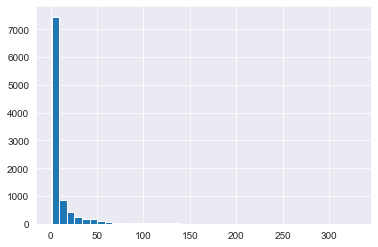

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline    #sets the backend of matplotlib to the 'inline' backend:
sns.set_style('dark')
plt.figure()
rating_mean_count['rating-count'].hist(bins=40)    #no of bins



In [ ]:
#from above graph we can infer that most movies have <than 50 rathings



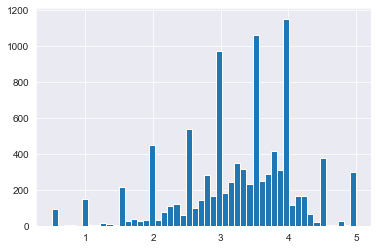

In [39]:
rating_mean_count['rating'].hist(bins=50)


In [ ]:
#most movies got the ratings got perfect int ratings 3.5 can be a exception 
#lets combine these two graphs

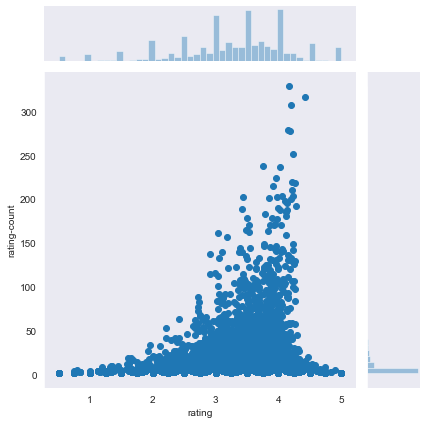

In [42]:
sns.jointplot(x='rating', y='rating-count', data=rating_mean_count)


In [45]:
#here higher the avg rating more no of rating count can be observed
user_rating= moviedata.pivot_table(index='userId',columns='title',values='rating')


In [46]:
user_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#lets find user rating for forrest gump

forrest_gump_ratings = user_rating['Forrest Gump (1994)']
forrest_gump_ratings.head()


userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [49]:
#for movies like forrest gump

movies_like_forest_gump = user_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

C:\Users\ROG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ROG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [50]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)


,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [54]:
#lets add rating count also

corr_forrest_gump = corr_forrest_gump.join(rating_mean_count['rating-count'])
corr_forrest_gump.head()

,Correlation,rating-count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [59]:
#now we need ratings more than >50 for more accuracy

corr_forrest_gump[corr_forrest_gump ['rating-count']>100].sort_values('Correlation', ascending=False).head()


,Correlation,rating-count
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [ ]:
#we can conclude that the movies that are displayed above has high no of ratings and fall in close 
#category as forrest gump 